In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
X = df.drop("quality", 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

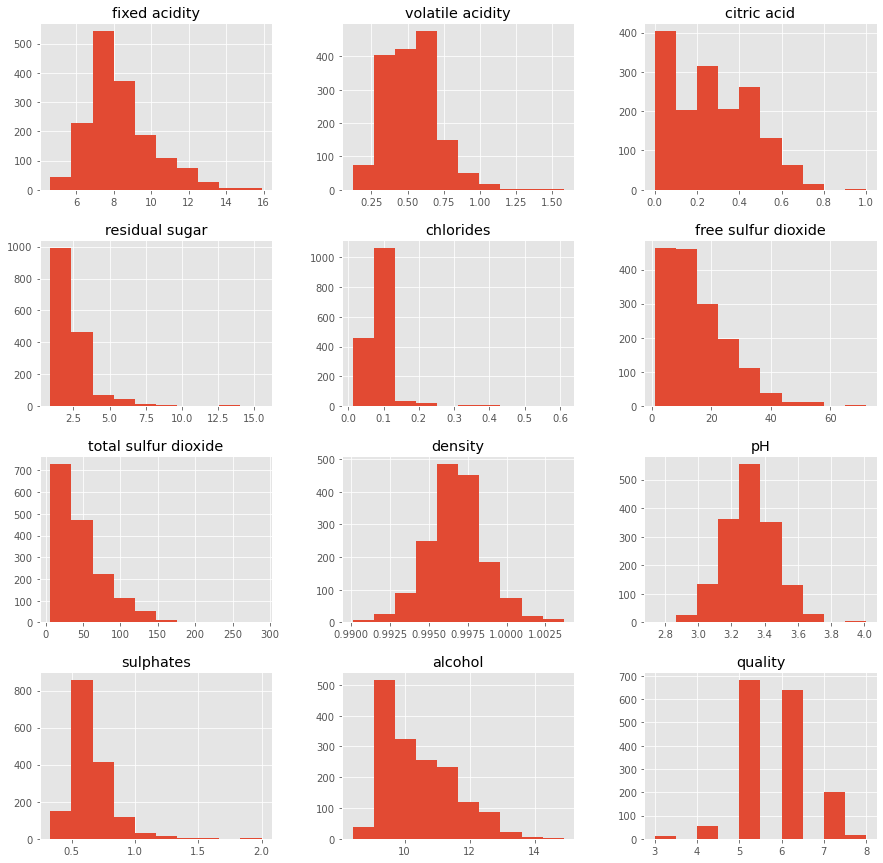

In [5]:
pd.DataFrame.hist(df, figsize=(15,15))

In [6]:
X = X.values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [7]:
y1 = df['quality'].values
y1

array([5, 5, 5, ..., 6, 5, 6])

In [8]:
X.shape #(jumlah wine, feauture)

(1599, 11)

In [9]:
y1.shape

(1599,)

### Preprocessing dengan Binary class

In [10]:
from sklearn.preprocessing import scale
Xs = scale(X)
Xs

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [11]:
mid = lambda m : lambda a : a <= m

In [12]:
mid_5 = mid(5)

In [13]:
mid_6 = mid(6)

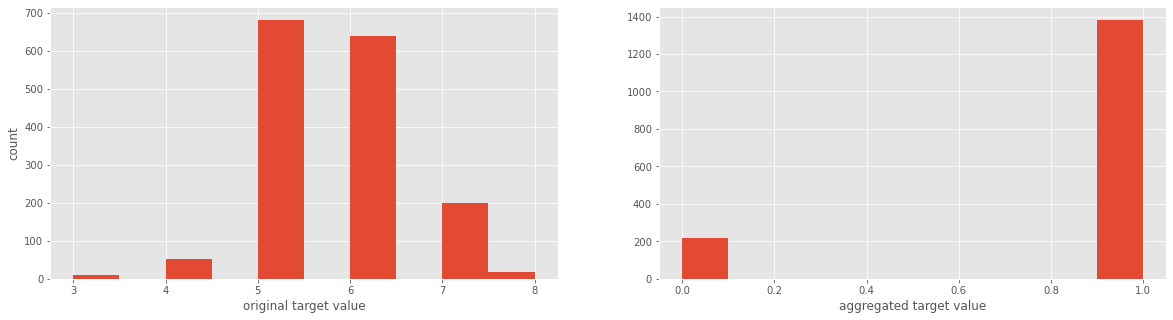

In [14]:
y = mid_6(y1)

y = y.astype("float32") #mengubah dari bool ke float

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(y1)
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1,2,2)
plt.hist(y)
plt.xlabel('aggregated target value')
plt.show()

## Split data untuk data training dengan ratio 20% / 80 : 20

keterangan : 
    test_size = 0.2 ---> mengambil 20% dari data untuk data testing

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs,y, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(1279, 11)

In [17]:
X_test.shape

(320, 11)

### Proses Training dengan neighbors = 3

In [18]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model_1 = knn.fit(X_train, y_train) # param 1 = feature , param 2 = target variabel

### Mengecek akurasi training diatas

In [19]:
knn_result_1 = knn_model_1.score(X_test, y_test) # membandingkan dengan testing data
print(f'akurasi test : {knn_result_1}')

akurasi test : 0.86875


### Mengecek report dari training diatas

In [20]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.43      0.49        47
         1.0       0.91      0.95      0.92       273

    accuracy                           0.87       320
   macro avg       0.74      0.69      0.71       320
weighted avg       0.86      0.87      0.86       320



### Mengecek data yang salah meggunakan confusion metric

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[ 20,  27],
       [ 15, 258]])

### KNN = 7

In [22]:
knn_7 = neighbors.KNeighborsClassifier(n_neighbors=7)
knn_model_2 = knn_7.fit(X_train, y_train)
knn_res_k7 = knn_model_2.score(X_test, y_test)

In [23]:
knn_res_k7

0.8875

In [24]:
knn_11 = neighbors.KNeighborsClassifier(n_neighbors=11)
knn_model_3 = knn_11.fit(X_train, y_train)
knn_res_k11 = knn_model_3.score(X_test, y_test)

In [25]:
knn_res_k11

0.875

In [26]:
knn_15 = neighbors.KNeighborsClassifier(n_neighbors=15)
knn_model_4 = knn_15.fit(X_train, y_train)
knn_res_k15 =  knn_model_4.score(X_test, y_test)

In [27]:
knn_res_k15

0.89375

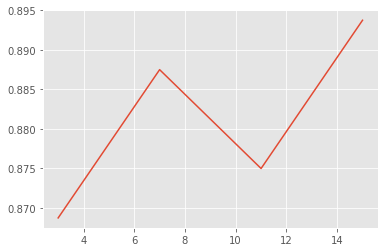

In [28]:
plt.plot([3,7,11,15], [knn_result_1, knn_res_k7, knn_res_k11, knn_res_k15])